#Machine Learning
`Autor: Erwing FC 
~erwingforerocastro@gmail.com`

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from google.colab import files

np.set_printoptions(precision=2)


#files.upload()
fruits = pd.read_csv('fruit_data_with_colors.csv')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# debemos aplicar la escala al conjunto de prueba que calculamos para el conjunto de entrenamiento
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print('Precisión del conjunto K-NN de entrenamiento: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Precisión del conjunto K-NN de test: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

example_fruit = [[5.5, 2.2, 10, 0.70]]
example_fruit_scaled = scaler.transform(example_fruit)
print('Predicción de fruta para ', example_fruit, ' es ', 
          target_names_fruits[knn.predict(example_fruit_scaled)[0]-1])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Precisión del conjunto K-NN de entrenamiento: 0.95
Precisión del conjunto K-NN de test: 1.00
Predicción de fruta para  [[5.5, 2.2, 10, 0.7]]  es  mandarin


###Datasets

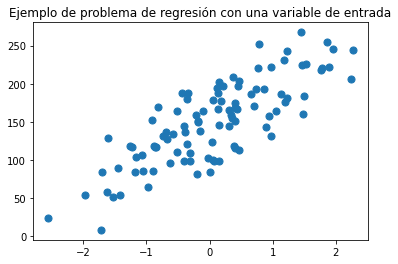

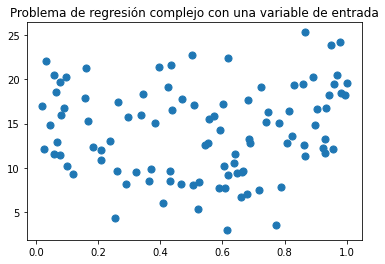

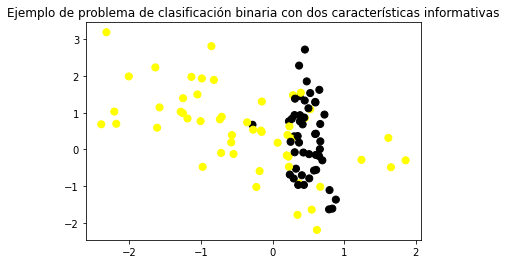

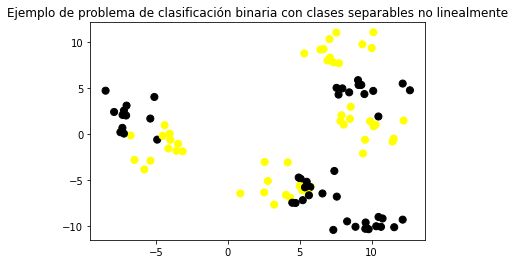

In [2]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset #subimos el archivo adspy_shared_utilities.py y CommViolPredUnnormalizedData.txt a coolab o jupyter

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])


# conjunto de datos sintéticos para regresión simple
from sklearn.datasets import make_regression
plt.figure()
plt.title('Ejemplo de problema de regresión con una variable de entrada')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()


# conjunto de datos sintéticos para una regresión más compleja
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Problema de regresión complejo con una variable de entrada')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

# conjunto de datos sintéticos para clasificación (binario)
plt.figure()
plt.title('Ejemplo de problema de clasificación binaria con dos características informativas')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


# conjunto de datos sintéticos más difíciles para la clasificación (binario)
# con clases que no son linealmente separables
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Ejemplo de problema de clasificación binaria con clases separables no linealmente')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


# Conjunto de datos de cáncer de mama para clasificación
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)


# Conjunto de datos de comunidades y delincuencia
(X_crime, y_crime) = load_crime_dataset()

###K-Nearest Neighbors

Clasificación

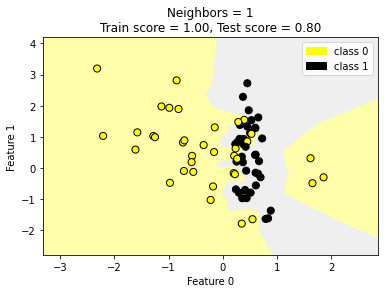

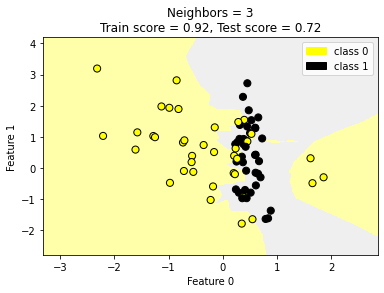

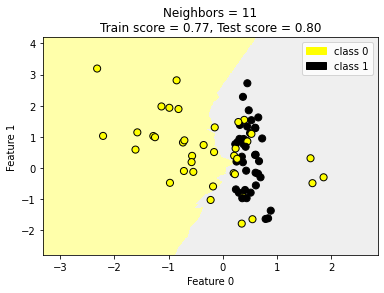

In [ ]:
from adspy_shared_utilities import plot_two_class_knn

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state=0)

plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 11, 'uniform', X_test, y_test)

Regresión

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

[231.71 148.36 150.59 150.59  72.15 166.51 141.91 235.57 208.26 102.1
 191.32 134.5  228.32 148.36 159.17 113.47 144.04 199.23 143.19 166.51
 231.71 208.26 128.02 123.14 141.91]
R-squared test score: 0.425


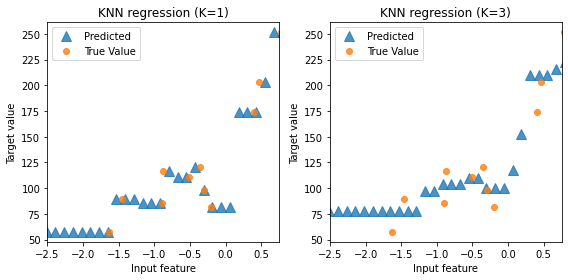

In [ ]:
fig, subaxes = plt.subplots(1, 2, figsize=(8,4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

Complejidad del modelo de regresión en función de K

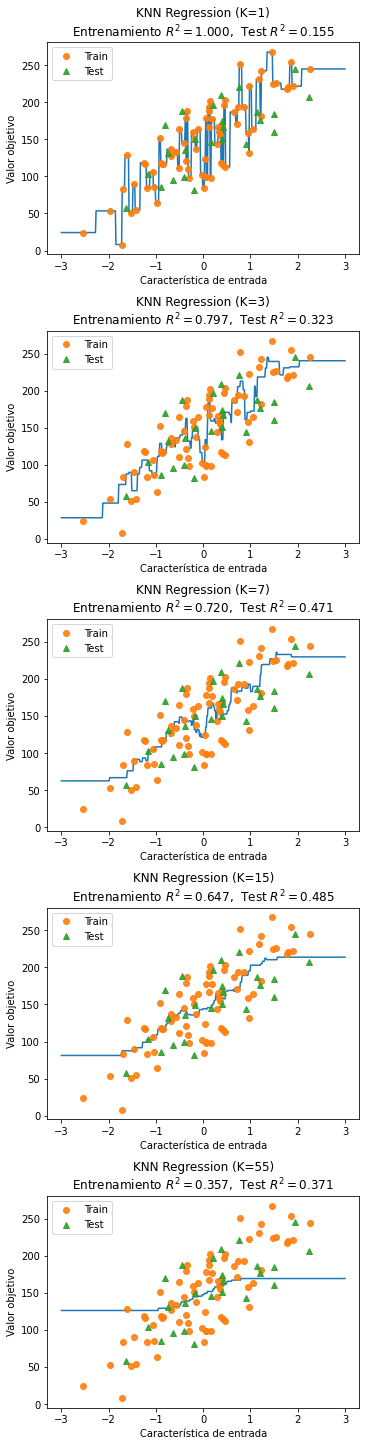

In [ ]:
# trazamos la regresión k-NN en el conjunto de datos de muestra para diferentes valores de K
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Característica de entrada')
    thisaxis.set_ylabel('Valor objetivo')
    thisaxis.set_title('KNN Regression (K={})\n\
Entrenamiento $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

###Models from linear regression

Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('modelo lineal coeff (w): {}'
     .format(linreg.coef_))
print('modelo lineal interc. (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

modelo lineal coeff (w): [45.71]
modelo lineal interc. (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492


Diagram from linear regression

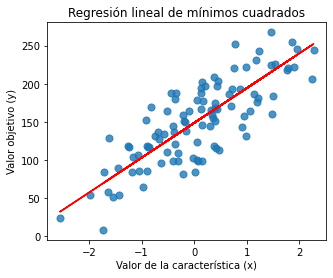

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Regresión lineal de mínimos cuadrados')
plt.xlabel('Valor de la característica (x)')
plt.ylabel('Valor objetivo (y)')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('Crime dataset')
print('linear model intercept: {}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

Crime dataset
linear model intercept: -1728.1306725979102
linear model coeff:
[ 1.62e-03 -9.43e+01  1.36e+01 -3.13e+01 -8.15e-02 -1.69e+01 -2.43e-03
  1.53e+00 -1.39e-02 -7.72e+00  2.28e+01 -5.66e+00  9.35e+00  2.07e-01
 -7.43e+00  9.66e-03  4.38e-03  4.80e-03 -4.46e+00 -1.61e+01  8.83e+00
 -5.07e-01 -1.42e+00  8.18e+00 -3.87e+00 -3.54e+00  4.49e+00  9.31e+00
  1.74e+02  1.18e+01  1.51e+02 -3.30e+02 -1.35e+02  6.95e-01 -2.38e+01
  2.77e+00  3.82e-01  4.39e+00 -1.06e+01 -4.92e-03  4.14e+01 -1.16e-03
  1.19e+00  1.75e+00 -3.68e+00  1.60e+00 -8.42e+00 -3.80e+01  4.74e+01
 -2.51e+01 -2.88e-01 -3.66e+01  1.90e+01 -4.53e+01  6.83e+02  1.04e+02
 -3.29e+02 -3.14e+01  2.74e+01  5.12e+00  6.92e+01  1.98e-02 -6.12e-01
  2.65e+01  1.01e+01 -1.59e+00  2.24e+00  7.38e+00 -3.14e+01 -9.78e-05
  5.02e-05 -3.48e-04 -2.50e-04 -5.27e-01 -5.17e-01 -4.10e-01  1.16e-01
  1.46e+00 -3.04e-01  2.44e+00 -3.66e+01  1.41e-01  2.89e-01  1.77e+01
  5.97e-01  1.98e+00 -1.36e-01 -1.85e+00]
R-squared score (training): 

####Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Dataset de crimen')
print('ridge modelo lineal de regresión interc: {}'
     .format(linridge.intercept_))
print('ridge modelo lineal de regresión coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Número de características distintas de cero: {}'
     .format(np.sum(linridge.coef_ != 0)))

Dataset de crimen
ridge modelo lineal de regresión interc: -3352.423035846137
ridge modelo lineal de regresión coeff:
[ 1.95e-03  2.19e+01  9.56e+00 -3.59e+01  6.36e+00 -1.97e+01 -2.81e-03
  1.66e+00 -6.61e-03 -6.95e+00  1.72e+01 -5.63e+00  8.84e+00  6.79e-01
 -7.34e+00  6.70e-03  9.79e-04  5.01e-03 -4.90e+00 -1.79e+01  9.18e+00
 -1.24e+00  1.22e+00  1.03e+01 -3.78e+00 -3.73e+00  4.75e+00  8.43e+00
  3.09e+01  1.19e+01 -2.05e+00 -3.82e+01  1.85e+01  1.53e+00 -2.20e+01
  2.46e+00  3.29e-01  4.02e+00 -1.13e+01 -4.70e-03  4.27e+01 -1.23e-03
  1.41e+00  9.35e-01 -3.00e+00  1.12e+00 -1.82e+01 -1.55e+01  2.42e+01
 -1.32e+01 -4.20e-01 -3.60e+01  1.30e+01 -2.81e+01  4.39e+01  3.87e+01
 -6.46e+01 -1.64e+01  2.90e+01  4.15e+00  5.34e+01  1.99e-02 -5.47e-01
  1.24e+01  1.04e+01 -1.57e+00  3.16e+00  8.78e+00 -2.95e+01 -2.33e-04
  3.14e-04 -4.14e-04 -1.79e-04 -5.74e-01 -5.18e-01 -4.21e-01  1.53e-01
  1.33e+00  3.85e+00  3.03e+00 -3.78e+01  1.38e-01  3.08e-01  1.57e+01
  3.31e-01  3.36e+00  1.61e-01

Ridge regression - with normalization features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Dataset de crimen')
print('ridge modelo lineal de regresión interc: {}'
     .format(linridge.intercept_))
print('ridge modelo lineal de regresión coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Número de características distintas de cero: {}'
     .format(np.sum(linridge.coef_ != 0)))

Dataset de crimen
ridge modelo lineal de regresión interc: 933.3906385044153
ridge modelo lineal de regresión coeff:
[  88.69   16.49  -50.3   -82.91  -65.9    -2.28   87.74  150.95   18.88
  -31.06  -43.14 -189.44   -4.53  107.98  -76.53    2.86   34.95   90.14
   52.46  -62.11  115.02    2.67    6.94   -5.67 -101.55  -36.91   -8.71
   29.12  171.26   99.37   75.07  123.64   95.24 -330.61 -442.3  -284.5
 -258.37   17.66 -101.71  110.65  523.14   24.82    4.87  -30.47   -3.52
   50.58   10.85   18.28   44.11   58.34   67.09  -57.94  116.14   53.81
   49.02   -7.62   55.14  -52.09  123.39   77.13   45.5   184.91  -91.36
    1.08  234.09   10.39   94.72  167.92  -25.14   -1.18   14.6    36.77
   53.2   -78.86   -5.9    26.05  115.15   68.74   68.29   16.53  -97.91
  205.2    75.97   61.38  -79.83   67.27   95.67  -11.88]
R-squared score (training): -3218104518.645
R-squared score (test): -14804941388.786
Número de características distintas de cero: 88


Ridge regression - con el parametro de regularización alpha

In [ ]:
print('Ridge Regresión con el parametro de regularización alpha\n')

for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)

    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
          r-squared entrenamiento: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge Regresión con el parametro de regularización alpha

Alpha = 0.00
num abs(coeff) > 1.0: 88,           r-squared entrenamiento: 0.67, r-squared test: 0.50

Alpha = 1.00
num abs(coeff) > 1.0: 87,           r-squared entrenamiento: 0.66, r-squared test: 0.56

Alpha = 10.00
num abs(coeff) > 1.0: 87,           r-squared entrenamiento: 0.63, r-squared test: 0.59

Alpha = 20.00
num abs(coeff) > 1.0: 88,           r-squared entrenamiento: 0.61, r-squared test: 0.60

Alpha = 50.00
num abs(coeff) > 1.0: 86,           r-squared entrenamiento: 0.58, r-squared test: 0.58

Alpha = 100.00
num abs(coeff) > 1.0: 87,           r-squared entrenamiento: 0.55, r-squared test: 0.55

Alpha = 1000.00
num abs(coeff) > 1.0: 84,           r-squared entrenamiento: 0.31, r-squared test: 0.30



####Lasso regresion

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('Dataset de crimen')
print('lasso modelo lineal de regresión interc: {}'
     .format(linlasso.intercept_))
print('lasso modelo lineal de regresión coeff:\n{}'
     .format(linlasso.coef_))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linlasso.score(X_test, y_test)))
print('Número de características distintas de cero: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('Características con peso distinto de cero (ordenado por magnitud absoluta):')

for e in sorted(list(zip(list(X_crime), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Dataset de crimen
ridge modelo lineal de regresión interc: 1186.612061998579
ridge modelo lineal de regresión coeff:
[    0.       0.      -0.    -168.18    -0.      -0.       0.     119.69
     0.      -0.       0.    -169.68    -0.       0.      -0.       0.
     0.       0.      -0.      -0.       0.      -0.       0.       0.
   -57.53    -0.      -0.       0.     259.33    -0.       0.       0.
     0.      -0.   -1188.74    -0.      -0.      -0.    -231.42     0.
  1488.37     0.      -0.      -0.      -0.       0.       0.       0.
     0.       0.      -0.       0.      20.14     0.       0.       0.
     0.       0.     339.04     0.       0.     459.54    -0.       0.
   122.69    -0.      91.41     0.      -0.       0.       0.      73.14
     0.      -0.       0.       0.      86.36     0.       0.       0.
  -104.57   264.93     0.      23.45   -49.39     0.       5.2      0.  ]
R-squared score (training): -539065463.056
R-squared score (test): -521807943.108
Número de car

####Polinomial regression

In [ ]:
#modelo lineal normal
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('modelo lineal coeff (w): {}'
     .format(linreg.coef_))
print('modelo lineal intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

#modelo polinomico
print('\nAhora transformaremos los datos de entrada y agregaremos\n\
caracteristicas polinomicas de grado 2 (quadratic)\n')

poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) modelo lineal coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) modelo lineal intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

#modelo polinomico con regularización
print('\nLa adición de muchas características polinómicas a menudo conduce a \n\
sobreajuste, por lo que a menudo usamos características polinómicas en combinación \n\
con regresión que tiene una penalización de regularización, como Ridge \n\
regresión. \n')

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) modelo lineal coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) modelo lineal intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

modelo lineal coeff (w): [ 4.42  6.    0.53 10.24  6.55 -2.02 -0.32]
modelo lineal intercept (b): 1.543
R-squared score (training): 0.722
R-squared score (test): 0.722

Ahora transformaremos los datos de entrada y agregaremos
caracteristicas polinomicas de grado 2 (quadratic)

(poly deg 2) modelo lineal coeff (w):
[ 3.41e-12  1.66e+01  2.67e+01 -2.21e+01  1.24e+01  6.93e+00  1.05e+00
  3.71e+00 -1.34e+01 -5.73e+00  1.62e+00  3.66e+00  5.05e+00 -1.46e+00
  1.95e+00 -1.51e+01  4.87e+00 -2.97e+00 -7.78e+00  5.15e+00 -4.65e+00
  1.84e+01 -2.22e+00  2.17e+00 -1.28e+00  1.88e+00  1.53e-01  5.62e-01
 -8.92e-01 -2.18e+00  1.38e+00 -4.90e+00 -2.24e+00  1.38e+00 -5.52e-01
 -1.09e+00]
(poly deg 2) modelo lineal intercept (b): -3.206
(poly deg 2) R-squared score (training): 0.969
(poly deg 2) R-squared score (test): 0.805


La adición de muchas características polinómicas a menudo conduce a 
sobreajuste, por lo que a menudo usamos características polinómicas en combinación 
con regresión que tiene

###Linear models for classification

Logistic regression

Una fruta con el altura 6 y el ancho 8 es predicha como: manzana
Una fruta con el altura 10 y el ancho 7 es predicha como: no es una manzana
Precisión del modelo de regresion logistica en el grupo de entrenamiento: 0.80
Precisión del modelo de regresion logistica en el grupo de test: 0.73


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


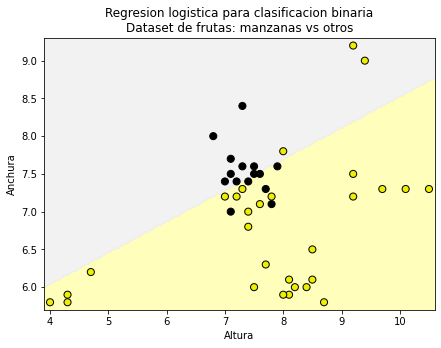

In [ ]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (plot_class_regions_for_classifier_subplot)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
y_fruits_apple = y_fruits_2d == 1   # convertirse en un problema binario: manzanas vs todo lo demás
X_train, X_test, y_train, y_test = (train_test_split(X_fruits_2d.to_numpy(),y_fruits_apple.to_numpy(),random_state = 0))

clf = LogisticRegression(C=100).fit(X_train, y_train)

plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None,
                                         None, 'Regresion logistica \
para clasificacion binaria\nDataset de frutas: manzanas vs otros',
                                         subaxes)

h = 6
w = 8
print('Una fruta con el altura {} y el ancho {} es predicha como: {}'
     .format(h,w, ['no es una manzana', 'manzana'][clf.predict([[h,w]])[0]]))

h = 10
w = 7
print('Una fruta con el altura {} y el ancho {} es predicha como: {}'
     .format(h,w, ['no es una manzana', 'manzana'][clf.predict([[h,w]])[0]]))

subaxes.set_xlabel('Altura')
subaxes.set_ylabel('Anchura')

print('Precisión del modelo de regresion logistica en el grupo de entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Precisión del modelo de regresion logistica en el grupo de test: {:.2f}'
     .format(clf.score(X_test, y_test)))

Logistic regression on simple synthetic dataset

Presición de Regresion logistica clasificador en el grupo de entrenamiento: 0.81
Presición de Regresion logistica clasificador en el grupo de test: 0.84


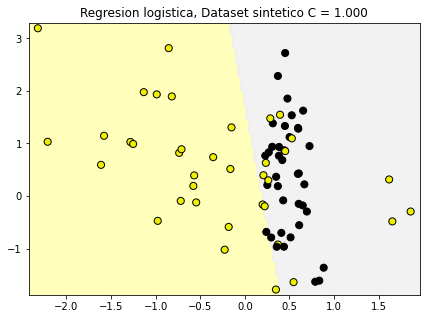

In [ ]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)


X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
clf = LogisticRegression().fit(X_train, y_train)
title = 'Regresion logistica, Dataset sintetico C = {:.3f}'.format(1.0)

plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                         None, None, title, subaxes)

print('Presición del clasificador de regresion logistica en el grupo de entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Presición del clasificador de regresion logistica en el grupo de test: {:.2f}'
     .format(clf.score(X_test, y_test)))

Logistic regression regularization: C parameter

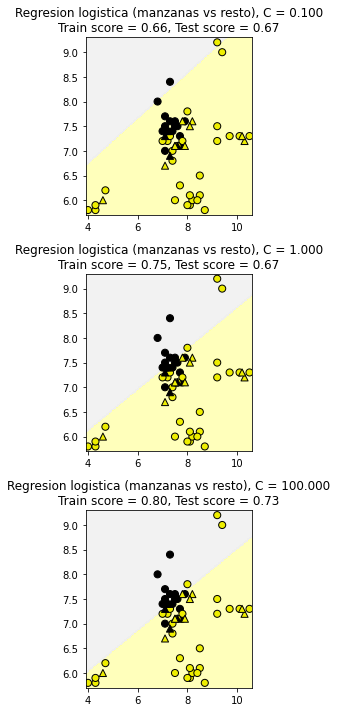

In [ ]:
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.to_numpy(),
                y_fruits_apple.to_numpy(),
                random_state=0))

fig, subaxes = plt.subplots(3, 1, figsize=(4, 10))

for this_C, subplot in zip([0.1, 1, 100], subaxes):
    clf = LogisticRegression(C=this_C).fit(X_train, y_train)
    title ='Regresion logistica (manzanas vs resto), C = {:.3f}'.format(this_C)
    
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             X_test, y_test, title,
                                             subplot)
plt.tight_layout()

Application to real dataset

In [ ]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LogisticRegression(max_iter=5000).fit(X_train, y_train)

print('Conjunto de datos sobre el cáncer de mama')
print('Presición del clasificador de regresion logistica en el grupo de entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Presición del clasificador de regresion logistica en el grupo de test: {:.2f}'
     .format(clf.score(X_test, y_test)))

Conjunto de datos sobre el cáncer de mama
Presición del clasificador de regresion logistica en el grupo de entrenamiento: 0.96
Presición del clasificador de regresion logistica en el grupo de test: 0.95


###Support vector machines

Linear support vector machine

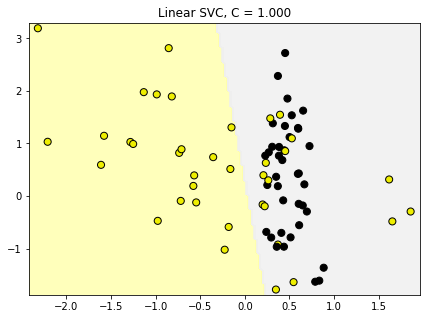

In [ ]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot


X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
this_C = 1.0
clf = SVC(kernel = 'linear', C=this_C).fit(X_train, y_train)

title = 'Linear SVC, C = {:.3f}'.format(this_C)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)

Linear support vector machine: C parameter

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


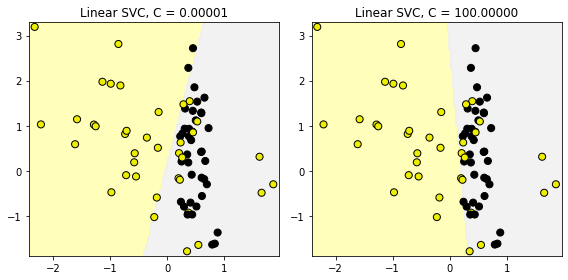

In [ ]:
from sklearn.svm import LinearSVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)
fig, subaxes = plt.subplots(1, 2, figsize=(8, 4))

for this_C, subplot in zip([0.00001, 100], subaxes):
    clf = LinearSVC(C=this_C).fit(X_train, y_train)
    title = 'Linear SVC, C = {:.5f}'.format(this_C)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
plt.tight_layout()

###Multi-class clasification with linear models

LinearSVC with M classes generates M one vs rest classifiers

In [ ]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)

clf = LinearSVC(C=5, random_state = 67).fit(X_train, y_train)

print('Coeficientes:\n', clf.coef_)
print('interceptaciones:\n', clf.intercept_)

Coeficientes:
 [[-0.26  0.71]
 [-1.63  1.16]
 [ 0.03  0.29]
 [ 1.24 -1.64]]
interceptaciones:
 [-3.29  1.2  -2.72  1.16]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Multi-class results on the fruit dataset

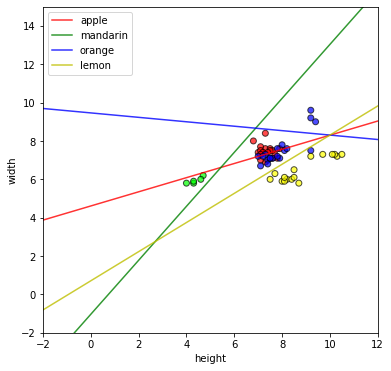

In [ ]:
plt.figure(figsize=(6,6))
colors = ['r', 'g', 'b', 'y']
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])

plt.scatter(X_fruits_2d[['height']], X_fruits_2d[['width']],
           c=y_fruits_2d, cmap=cmap_fruits, edgecolor = 'black', alpha=.7)

x_0_range = np.linspace(-10, 15)

for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'g', 'b', 'y']):
    # Dado que la predicción de clase con un modelo lineal utiliza la fórmula y = w_0 x_0 + w_1 x_1 + b,
     # y el límite de decisión se define como todos los puntos con y = 0, para trazar x_1 como un
     # función de x_0 solo resolvemos w_0 x_0 + w_1 x_1 + b = 0 para x_1:
    plt.plot(x_0_range, - (x_0_range * w[0] + b) / w[1], c=color, alpha=.8)
    
plt.legend(target_names_fruits)
plt.xlabel('Alto')
plt.ylabel('Ancho')
plt.xlim(-2, 12)
plt.ylim(-2, 15)
plt.show()

###Kernelized Support Vector Machines

Classification

In [8]:
X_cancer[0:3]

array([[1.80e+01, 1.04e+01, 1.23e+02, 1.00e+03, 1.18e-01, 2.78e-01,
        3.00e-01, 1.47e-01, 2.42e-01, 7.87e-02, 1.09e+00, 9.05e-01,
        8.59e+00, 1.53e+02, 6.40e-03, 4.90e-02, 5.37e-02, 1.59e-02,
        3.00e-02, 6.19e-03, 2.54e+01, 1.73e+01, 1.85e+02, 2.02e+03,
        1.62e-01, 6.66e-01, 7.12e-01, 2.65e-01, 4.60e-01, 1.19e-01],
       [2.06e+01, 1.78e+01, 1.33e+02, 1.33e+03, 8.47e-02, 7.86e-02,
        8.69e-02, 7.02e-02, 1.81e-01, 5.67e-02, 5.43e-01, 7.34e-01,
        3.40e+00, 7.41e+01, 5.22e-03, 1.31e-02, 1.86e-02, 1.34e-02,
        1.39e-02, 3.53e-03, 2.50e+01, 2.34e+01, 1.59e+02, 1.96e+03,
        1.24e-01, 1.87e-01, 2.42e-01, 1.86e-01, 2.75e-01, 8.90e-02],
       [1.97e+01, 2.12e+01, 1.30e+02, 1.20e+03, 1.10e-01, 1.60e-01,
        1.97e-01, 1.28e-01, 2.07e-01, 6.00e-02, 7.46e-01, 7.87e-01,
        4.58e+00, 9.40e+01, 6.15e-03, 4.01e-02, 3.83e-02, 2.06e-02,
        2.25e-02, 4.57e-03, 2.36e+01, 2.55e+01, 1.52e+02, 1.71e+03,
        1.44e-01, 4.24e-01, 4.50e-01, 2.43e-01

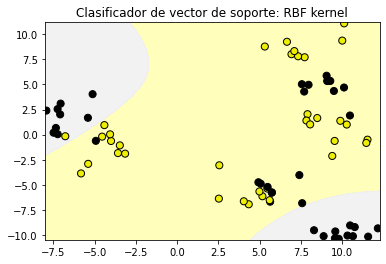

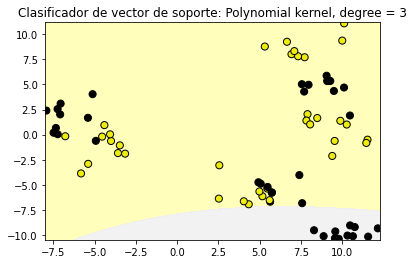

In [ ]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

# El kernel SVC predeterminado es la función de base radial (RBF)
plot_class_regions_for_classifier(SVC().fit(X_train, y_train),
                                 X_train, y_train, None, None,
                                 'Clasificador de vector de soporte: RBF kernel')

# Compare los límites de decisión con el núcleo polinomial, grado = 3
plot_class_regions_for_classifier(SVC(kernel = 'poly', degree = 3)
                                 .fit(X_train, y_train), X_train,
                                 y_train, None, None,
                                 'Clasificador de vector de soporte: Polynomial kernel, degree = 3')

Support Vector Machine with RBF kernel: gamma parameter

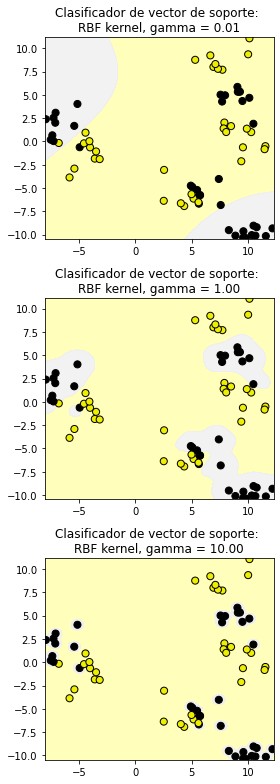

In [ ]:
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 1, figsize=(4, 11))

for this_gamma, subplot in zip([0.01, 1.0, 10.0], subaxes):
    clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
    title = 'Clasificador de vector de soporte: \nRBF kernel, gamma = {:.2f}'.format(this_gamma)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
    plt.tight_layout()

Support Vector Machine with RBF kernel: using both C and gamma parameter

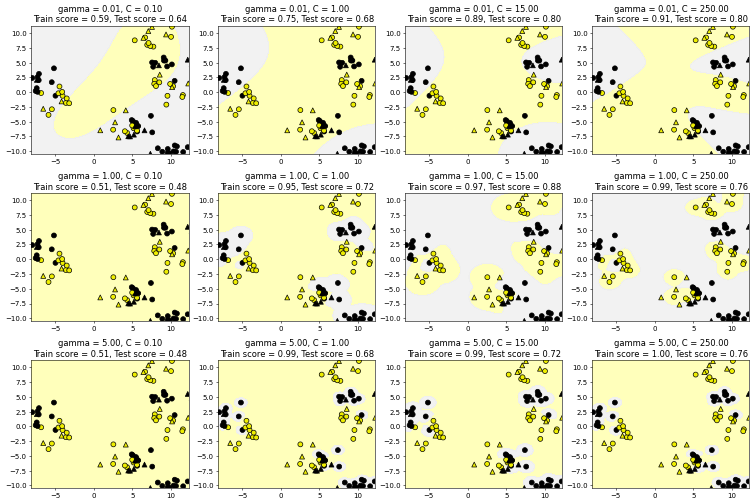

In [ ]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 4, figsize=(15, 10), dpi=50)

for this_gamma, this_axis in zip([0.01, 1, 5], subaxes):
    
    for this_C, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        clf = SVC(kernel = 'rbf', gamma = this_gamma,
                 C = this_C).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                                 X_test, y_test, title,
                                                 subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

Application of SVMs to a real dataset: unnormalized data

In [ ]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)

clf = SVC(C=10).fit(X_train, y_train)
print('Conjunto de datos sobre el cáncer de mama (caracteristicas no normalizadas)')
print('precisión RBF-kernel SVC en el grupo de entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('precisión RBF-kernel SVC en el grupo de test: {:.2f}'
     .format(clf.score(X_test, y_test)))

Conjunto de datos sobre el cáncer de mama (caracteristicas no normalizadas)
precisión RBF-kernel SVC en el grupo de entrenamiento: 0.92
precisión RBF-kernel SVC en el grupo de test: 0.94


Application of SVMs to a real dataset: normalized data with feature preprocessing using minmax scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=10).fit(X_train_scaled, y_train)
print('Conjunto de datos sobre el cáncer de mama (caracteristicas no normalizadas)')
print('precisión RBF-kernel SVC (con minMax scaler) en el grupo de entrenamiento: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('precisión RBF-kernel SVC (con minMax scaler) en el grupo de test: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Conjunto de datos sobre el cáncer de mama (caracteristicas no normalizadas)
precisión RBF-kernel SVC en el grupo de entrenamiento: 0.99
precisión RBF-kernel SVC en el grupo de test: 0.97


###Cross-validation

Example based on k-NN classifier with fruit dataset (2 features)

In [ ]:
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors = 5)
X = X_fruits_2d.to_numpy()
y = y_fruits_2d.to_numpy()
cv_scores = cross_val_score(clf, X, y)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (3-fold): [0.75 0.75 0.83 0.83 0.82]
Mean cross-validation score (3-fold): 0.797


###Validation curve

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(SVC(), X, y,
                                            param_name='gamma',
                                            param_range=param_range, cv=3)
print(train_scores)
print()
print(test_scores)

[[0.46 0.44 0.42]
 [0.85 0.72 0.75]
 [0.92 0.9  0.93]
 [1.   1.   0.97]]

[[0.5  0.3  0.32]
 [0.85 0.7  0.63]
 [0.55 0.85 0.68]
 [0.4  0.2  0.37]]


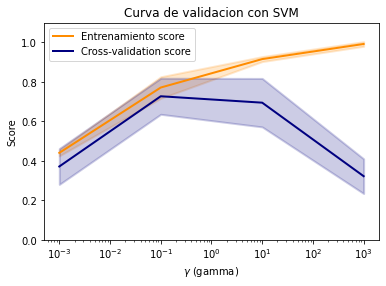

In [ ]:
#este codigo es basado en scikit-learn validation_plot example
#see http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
plt.figure(facecolor='white')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Curva de validacion con SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Entrenamiento score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

###Decision Trees

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from sklearn.model_selection import train_test_split


iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 3)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Precisión clasificacion de arboles de descición grupo de entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Precisión clasificacion de arboles de descición grupo de test: {:.2f}'
     .format(clf.score(X_test, y_test)))

Precisión clasificacion de arboles de descición grupo de entrenamiento: 1.00
Precisión clasificacion de arboles de descición grupo de test: 0.95


Setting max decision tree depth to help avoid overfitting

In [ ]:
clf2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Precisión clasificacion de arboles de descición grupo de entrenamiento: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Precisión clasificacion de arboles de descición grupo de test: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Precisión clasificacion de arboles de descición grupo de entrenamiento: 0.98
Precisión clasificacion de arboles de descición grupo de test: 0.97


Visualizing decision trees

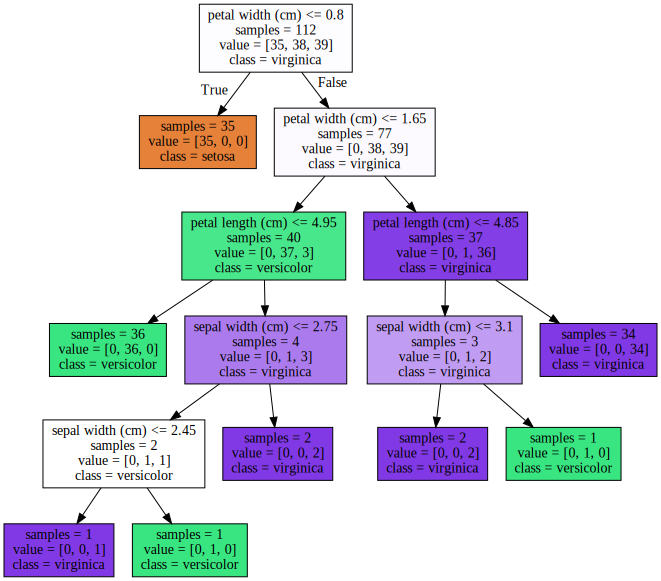

In [ ]:
plot_decision_tree(clf, iris.feature_names, iris.target_names)

Pre-pruned version (max_depth = 3)

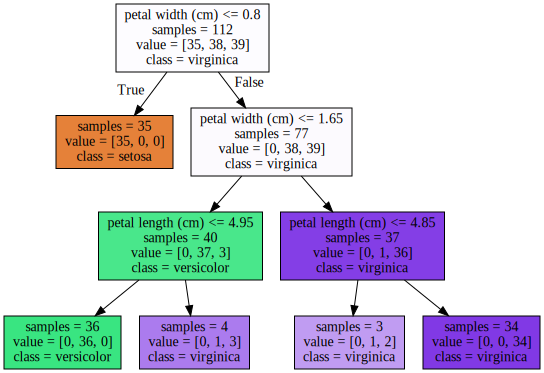

In [ ]:
plot_decision_tree(clf2, iris.feature_names, iris.target_names)

Feature importance

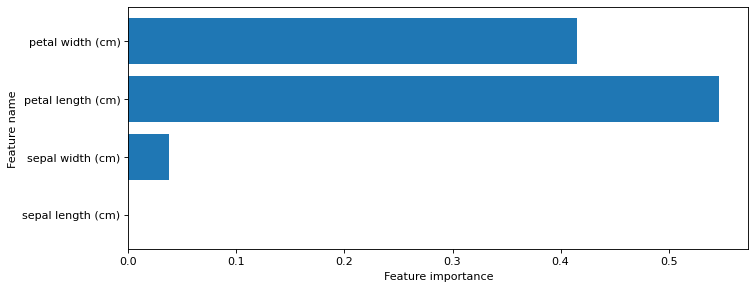

Importancia de características: [0.   0.04 0.55 0.42]


In [ ]:
from adspy_shared_utilities import plot_feature_importances

plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf, iris.feature_names)
plt.show()

print('Importancia de características: {}'.format(clf.feature_importances_))

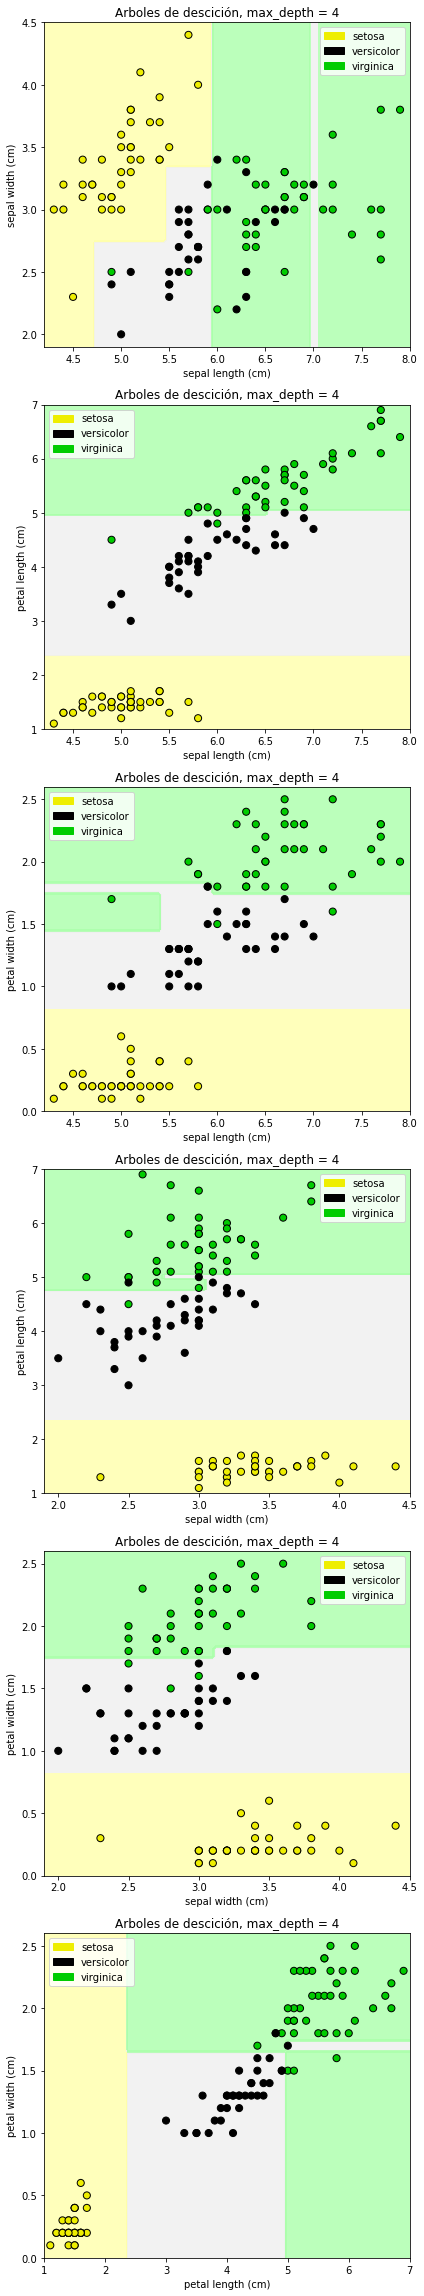

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
tree_max_depth = 4

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = DecisionTreeClassifier(max_depth=tree_max_depth).fit(X, y)
    title = 'Arboles de descición, max_depth = {:d}'.format(tree_max_depth)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             iris.target_names)
    
    axis.set_xlabel(iris.feature_names[pair[0]])
    axis.set_ylabel(iris.feature_names[pair[1]])
    
plt.tight_layout()
plt.show()

Decision Trees on a real-world dataset

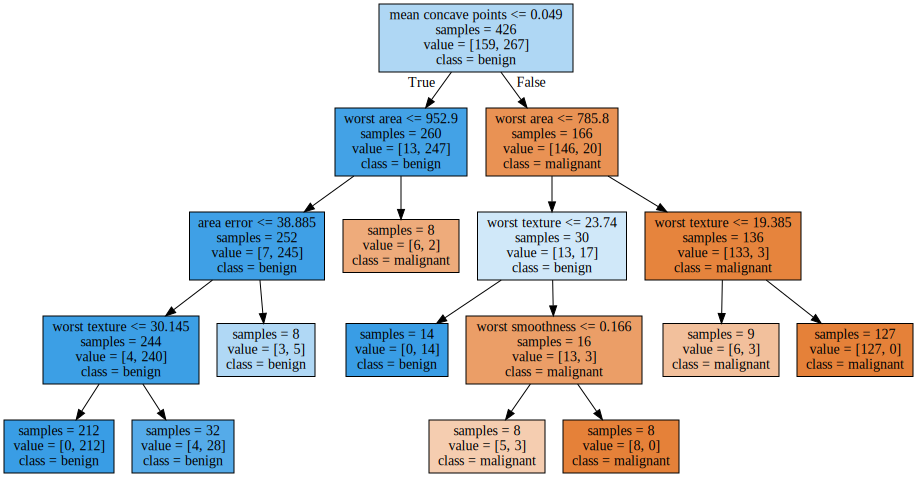

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from adspy_shared_utilities import plot_feature_importances

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = DecisionTreeClassifier0(max_depth = 4, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)

plot_decision_tree(clf, cancer.feature_names, cancer.target_names)

Conjunto de datos sobre el cáncer de mama: arbol de descición
Precisión del calisificador DT en el grupo de entrenamiento: 0.96
Precisión del calisificador DT en el grupo de test: 0.94


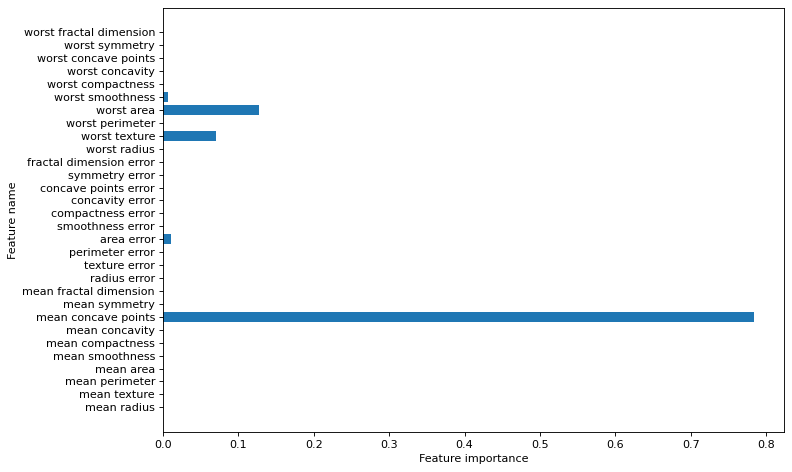

In [ ]:
print('Conjunto de datos sobre el cáncer de mama: arbol de descición')
print('Precisión del calisificador DT en el grupo de entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Precisión del calisificador DT en el grupo de test: {:.2f}'
     .format(clf.score(X_test, y_test)))

plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(clf, cancer.feature_names)
plt.tight_layout()

plt.show()